In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('train.csv')
a = 42
train, test = train_test_split(data, test_size=0.2, random_state=a)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
331,332,0,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
382,383,0,3,"Tikkanen, Mr. Juho",male,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S
704,705,0,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,350025,7.8542,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,S


In [4]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
439,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C


In [5]:
train.shape

(712, 12)

In [6]:
test.shape

(179, 12)

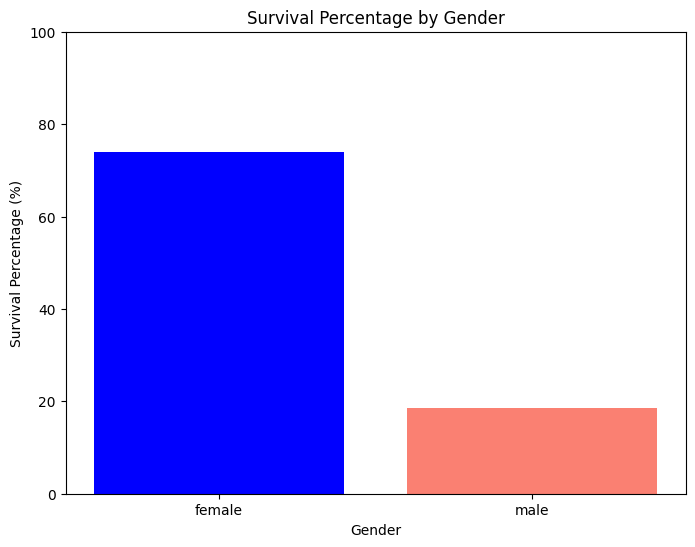

In [7]:
survival_percentages = train.groupby('Sex')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))
plt.bar(survival_percentages.index, survival_percentages, color=['blue', 'salmon'])
plt.xlabel('Gender')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Percentage by Gender')
plt.ylim(0, 100)
plt.show()

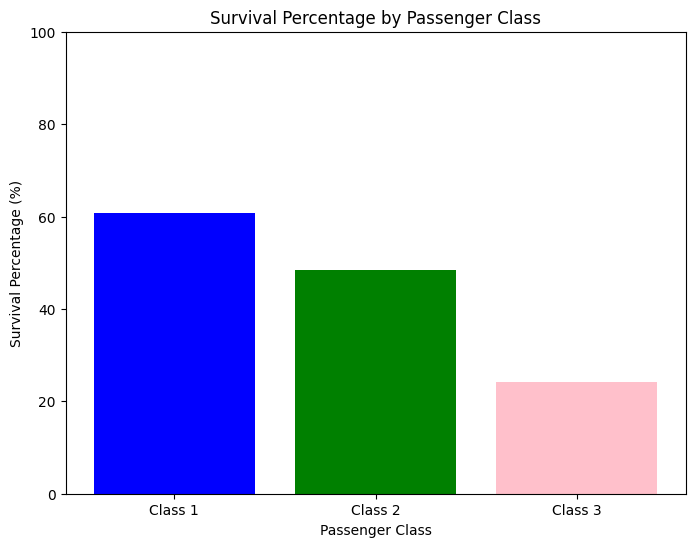

In [8]:
survival_percentages_by_class = train.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8, 6))

plt.bar(survival_percentages_by_class.index, survival_percentages_by_class, color=['blue','green','pink'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Percentage (%)')
plt.title('Survival Percentage by Passenger Class')
plt.ylim(0, 100)
plt.xticks(ticks=survival_percentages_by_class.index, labels=[f'Class {i}' for i in survival_percentages_by_class.index])

plt.show()

In [9]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7387755102040816


In [10]:
men = train.loc[train.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18629550321199143


In [11]:
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


#makes sex 1 or 0
train['Sex'] = train['Sex'].map({'male': 1, 'female': 0})
train.drop(columns=['Cabin'], inplace=True)



In [12]:
#selects data to train on
features = ['Pclass', 'Sex', 'Age']







X = train[features]
y = train['Survived']

# clf = DecisionTreeClassifier(max_depth=22) 
# clf.fit(X, y)

# clf

In [13]:
# test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})
# test.drop(columns=['Cabin'], inplace=True)  # Optionally drop Cabin

# # Select features for the test data
# X_test = test[features]  # 'features' is the list you used in training


# test

In [14]:
# # Step 3: Make predictions using the trained model
# y_pred = clf.predict(X_test)

# # Step 4: (If test.csv has true labels) Compare predictions with true labels
# # Assuming you have the actual 'Survived' column in the test data
# y_true = test['Survived']  # This is only available if your test data includes the true labels

# y_true

# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_true, y_pred)

# print(f"Accuracy: {accuracy*100}%")

# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree

# # Plot the decision tree
# plt.figure(figsize=(20,10))  # Set the figure size
# plot_tree(clf, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'], rounded=True)
# plt.show()


In [15]:
print(train.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [17]:
train_errors = []
validation_errors = []
max_depth_range = range(1, 20)

for max_depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=a)
    
    # Cross-validation to calculate validation error
    validation_score = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    
    # Fit model and calculate training error
    clf.fit(X, y)
    training_error = 1 - clf.score(X, y)
    validation_error = 1 - np.mean(validation_score)
    
    train_errors.append(training_error)
    validation_errors.append(validation_error)

Optimal max_depth: 5


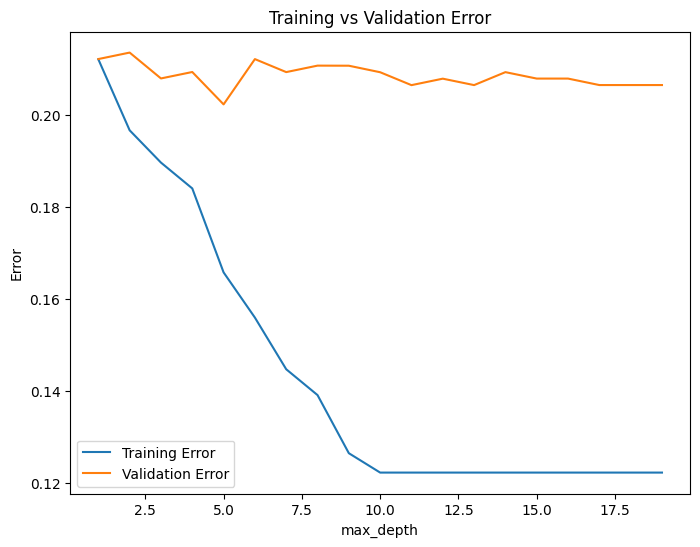

In [18]:
optimal_depth = max_depth_range[np.argmin(validation_errors)]
print(f"Optimal max_depth: {optimal_depth}")

plt.figure(figsize=(8, 6))
plt.plot(max_depth_range, train_errors, label='Training Error')
plt.plot(max_depth_range, validation_errors, label='Validation Error')
plt.xlabel('max_depth')
plt.ylabel('Error')
plt.legend()
plt.title('Training vs Validation Error')
plt.show()

In [19]:
clf = DecisionTreeClassifier(max_depth=optimal_depth, random_state=a)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [20]:
test['Sex'] = test['Sex'].map({'male': 1, 'female': 0})
test.drop(columns=['Cabin'], inplace=True)

X_test = test[features]
y_true = test['Survived']

In [21]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 79.89%


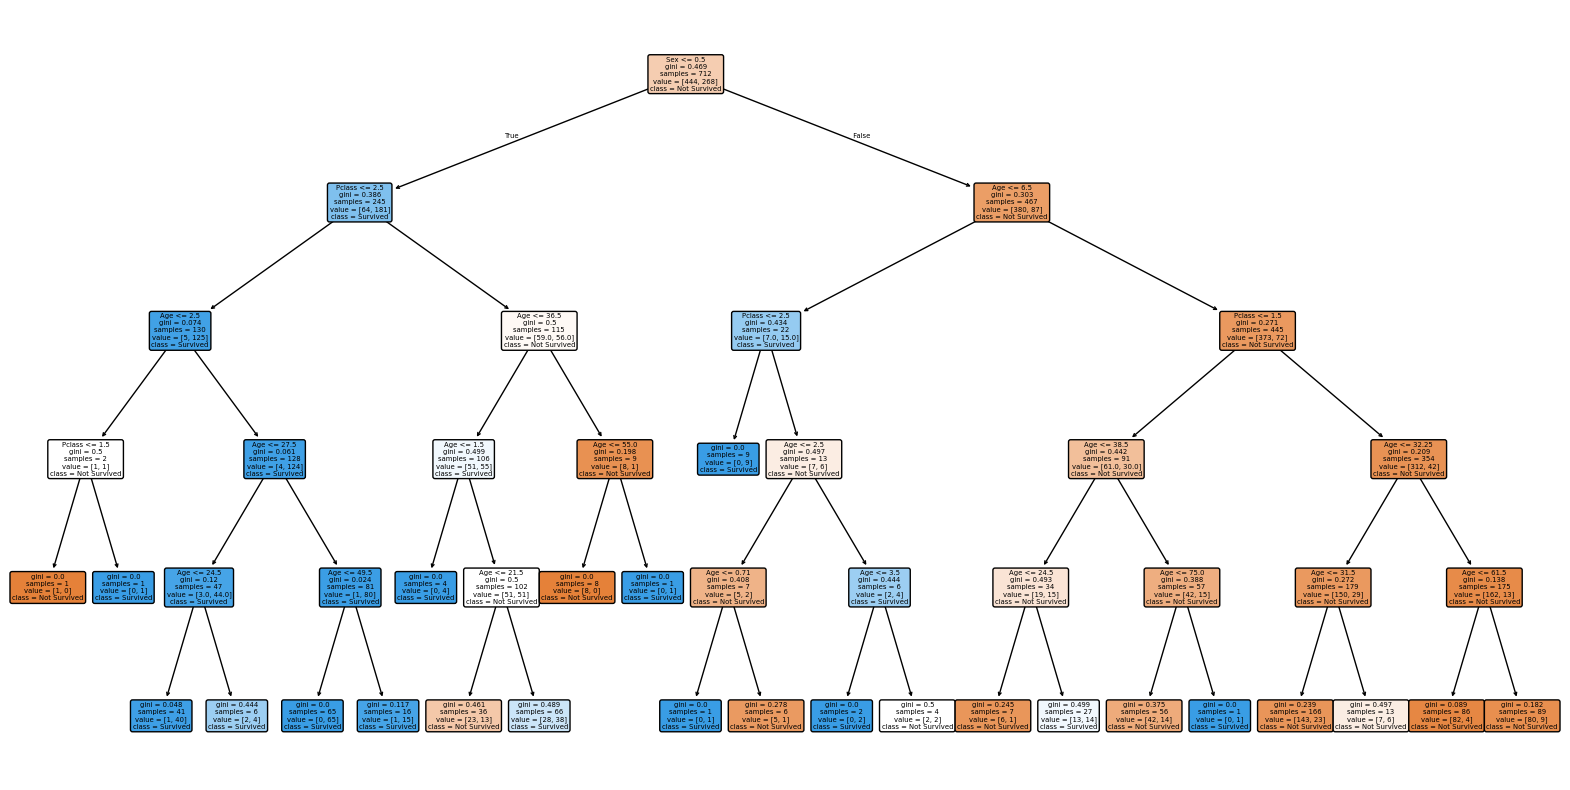

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(clf, filled=True, feature_names=features, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()

In [23]:
# Load the test.csv data (assuming the 'test.csv' file is similar to the Titanic dataset structure)
test_data_path = 'Test.csv'
test_data = pd.read_csv(test_data_path)

# Preprocess the test data (the same way we processed the training data)
test_data['Sex'] = test_data['Sex'].map({'male': 1, 'female': 0})
test_data.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Select the features used in the model
X_test = test_data[features]

# Make predictions using the trained model
test_predictions = clf.predict(X_test)

# Create the new DataFrame with PassengerId and Survived columns
output_df = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Save the new CSV file
output_file_path = 'test_survival_predictions.csv'
output_df.to_csv(output_file_path, index=False)

output_file_path

'test_survival_predictions.csv'